# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_merge


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice.
unique_mouseID = len(mouse_merge["Mouse ID"].unique())
unique_mouseID

249

In [34]:
all_mouseID = len(mouse_merge["Mouse ID"])
all_mouseID

1893

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_merge[mouse_merge.duplicated(["Mouse ID", "Timepoint"])]
duplicates = duplicates["Mouse ID"].unique()


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_mice = mouse_merge[mouse_merge["Mouse ID"].isin(duplicates)==False]
updated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Checking the number of mice in the clean DataFrame.
new_mouseID = len(updated_mice["Mouse ID"].unique())
new_mouseID

248

In [38]:
# reset index on updated DF
final_mice = updated_mice.reset_index()
final_mice

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tv_mean = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tv_mean = pd.DataFrame(tv_mean)
tv_mean.columns=["Mean Tumor Volume"]
tv_median = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tv_median = pd.DataFrame(tv_median)
tv_median.columns=["Median Tumor Volume"]
tv_variance = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tv_variance = pd.DataFrame(tv_variance)
tv_variance.columns=["Tumor Volume Variance"]
tv_stddv = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tv_stddv = pd.DataFrame(tv_stddv)
tv_stddv.columns=["Tumor Volume Std Dev"]
tv_sem = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tv_sem = pd.DataFrame(tv_sem)
tv_sem.columns=["Tumor Volume Std. Err."]

tv_stats = pd.concat([tv_mean, tv_median, tv_variance, tv_stddv, tv_sem], axis=1)
tv_stats = pd.DataFrame(tv_stats)
tv_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tvstatsbydrug = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tvstatsbydrug = pd.DataFrame(tvstatsbydrug)
# tvstatsbydrug.style.set_caption("Tumor Volume (mm3)")
# tvstatsbydrug = tvstatsbydrug.style.set_caption('Tumor Volume (mm3)')
tvstatsbydrug.columns = pd.MultiIndex.from_tuples(
    zip(["Tumor Volume mm3",'','','',''],tvstatsbydrug.columns))
tvstatsbydrug

Tumor Volume mm3                                          
                         mean     median        var       std       sem
Drug Regimen                                                           
Capomulin           40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin            52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol           52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril            55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol            54.331565  52.509285  66.173479  8.134708  0.596466
Placebo             54.033581  52.288934  61.168083  7.821003  0.581331
Propriva            52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane            40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn            54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol           53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [41]:
mice_tested_per_drug = final_mice["Drug Regimen"].value_counts() ; mice_tested_per_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<AxesSubplot:title={'center':'Total number of timepoints tested per drug regimen'}, xlabel='Drug Regimen', ylabel='Number of timepoints/mice'>

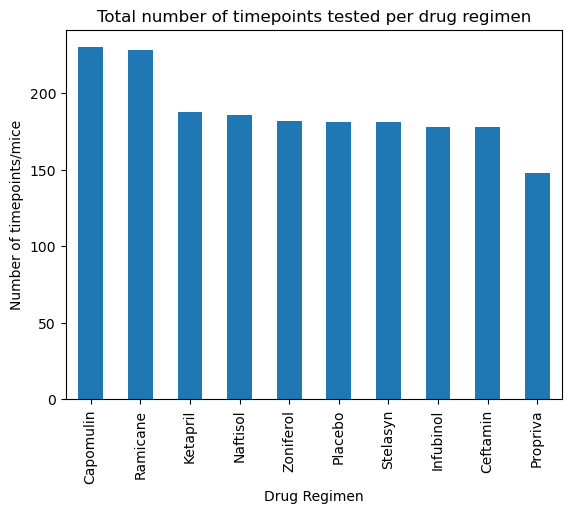

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested_per_drug.plot(kind='bar', ylabel="Number of timepoints/mice", xlabel="Drug Regimen",title="Total number of timepoints tested per drug regimen")



Text(0, 0.5, 'Number of timepoints/mice')

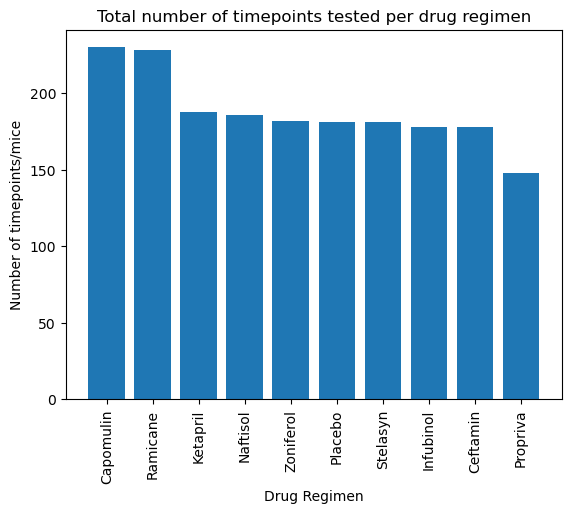

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(mice_tested_per_drug.index.values, mice_tested_per_drug)
plt.xticks(rotation=90)
plt.title("Total number of timepoints tested per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of timepoints/mice")


In [44]:
# number of mice per sex
mice_by_sex = final_mice["Sex"].value_counts() ; mice_by_sex

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Percentage of Mice by Sex'}>

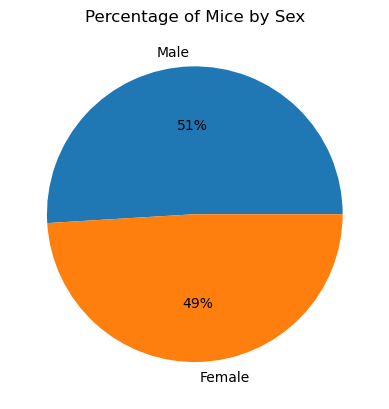

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_by_sex.plot(kind='pie', ylabel='', autopct='%1.0f%%', title="Percentage of Mice by Sex")


Text(0.5, 1.0, 'Percentage of Mice by Sex')

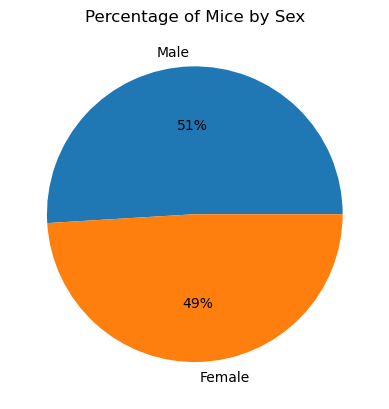

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_by_sex, labels=mice_by_sex.index, autopct='%1.0f%%')
plt.title("Percentage of Mice by Sex")



## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_mice.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merge = last_timepoint.merge(final_mice, on=["Mouse ID","Timepoint"], how='left')
timepoint_merge

,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,463,Infubinol,Female,20,23,67.973419,2
1,a251,45,473,Infubinol,Female,21,25,65.525743,1
2,a262,45,483,Placebo,Female,17,29,70.717621,4
3,a275,45,493,Ceftamin,Female,20,28,62.999356,3
4,a366,30,500,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...
243,z435,10,1862,Propriva,Female,12,26,48.710661,0
244,z578,45,84,Ramicane,Male,11,16,30.638696,0
245,z581,45,1872,Infubinol,Female,24,25,62.754451,3
246,z795,45,1882,Naftisol,Female,13,29,65.741070,3


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tvol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tvol = timepoint_merge.loc[timepoint_merge["Drug Regimen"]==treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tvol_data.append(tvol)
    
    quartiles = tvol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # print(f"The lower quartile of temperatures is: {lowerq}")
    # print(f"The upper quartile of temperatures is: {upperq}")
    # print(f"The interquartile range of temperatures is: {iqr}")
    # print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # print(f"Values below {lower_bound} could be outliers.")
    # print(f"Values above {upper_bound} could be outliers.")

    tvol_df = pd.DataFrame(tvol)
    outlier = tvol_df.loc[(tvol_df['Tumor Volume (mm3)']>=upper_bound)|(tvol_df['Tumor Volume (mm3)']<=lower_bound)]
    print(treatment, outlier)
    

Capomulin Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Ramicane Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Infubinol     Tumor Volume (mm3)
31           36.321346
Ceftamin Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


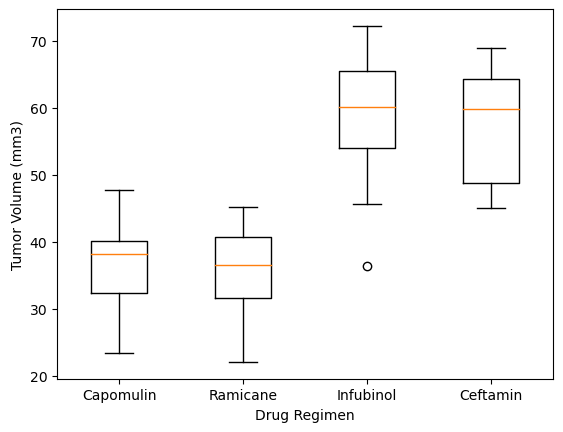

In [49]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tvol_data, labels=treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

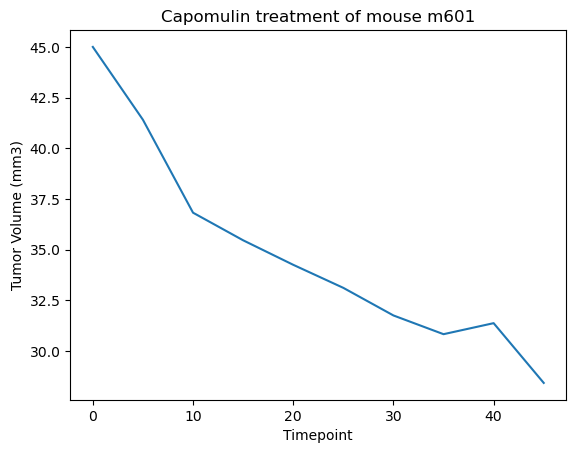

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# pd.set_option('display.max_rows', 230) so I can view all mouse ID options in the capomulin df.
capomulin = final_mice.loc[final_mice['Drug Regimen'] == "Capomulin"]
single_mouse = capomulin.loc[capomulin['Mouse ID'] == 'm601']
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse m601")
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])

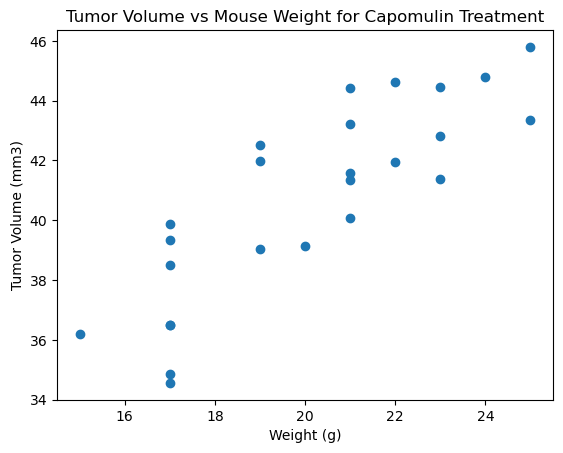

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_cap_vol = capomulin.groupby(["Mouse ID"]).mean()
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Mouse Weight for Capomulin Treatment")
plt.scatter(avg_cap_vol["Weight (g)"], avg_cap_vol["Tumor Volume (mm3)"])


## Correlation and Regression

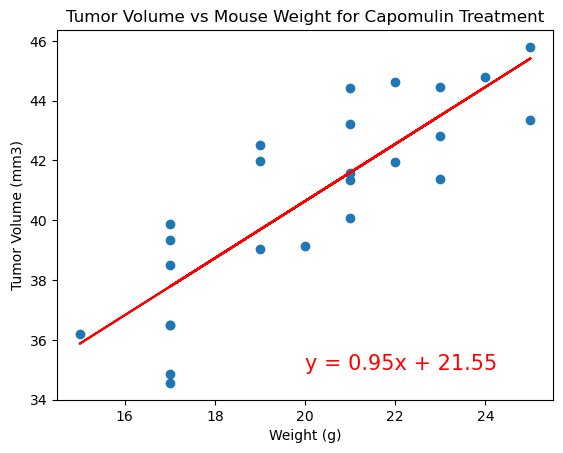

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = avg_cap_vol["Weight (g)"]
y= avg_cap_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Mouse Weight for Capomulin Treatment")
plt.show()
